In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [7]:
df = pd.read_csv('EastWestAirlines.csv', index_col= "ID#")

## Data Preprocessing:

In [11]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [15]:
# Missing Value Detection 
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [17]:
Award = df["Award?"]


In [19]:
# drop Class Labels
df.drop(columns="Award?",inplace= True)

In [21]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
ID#,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000
2,19244,0,1,1,1,215,2,0,0,6968
3,41354,0,1,1,1,4123,4,0,0,7034
4,14776,0,1,1,1,500,1,0,0,6952
5,97752,0,4,1,1,43300,26,2077,4,6935


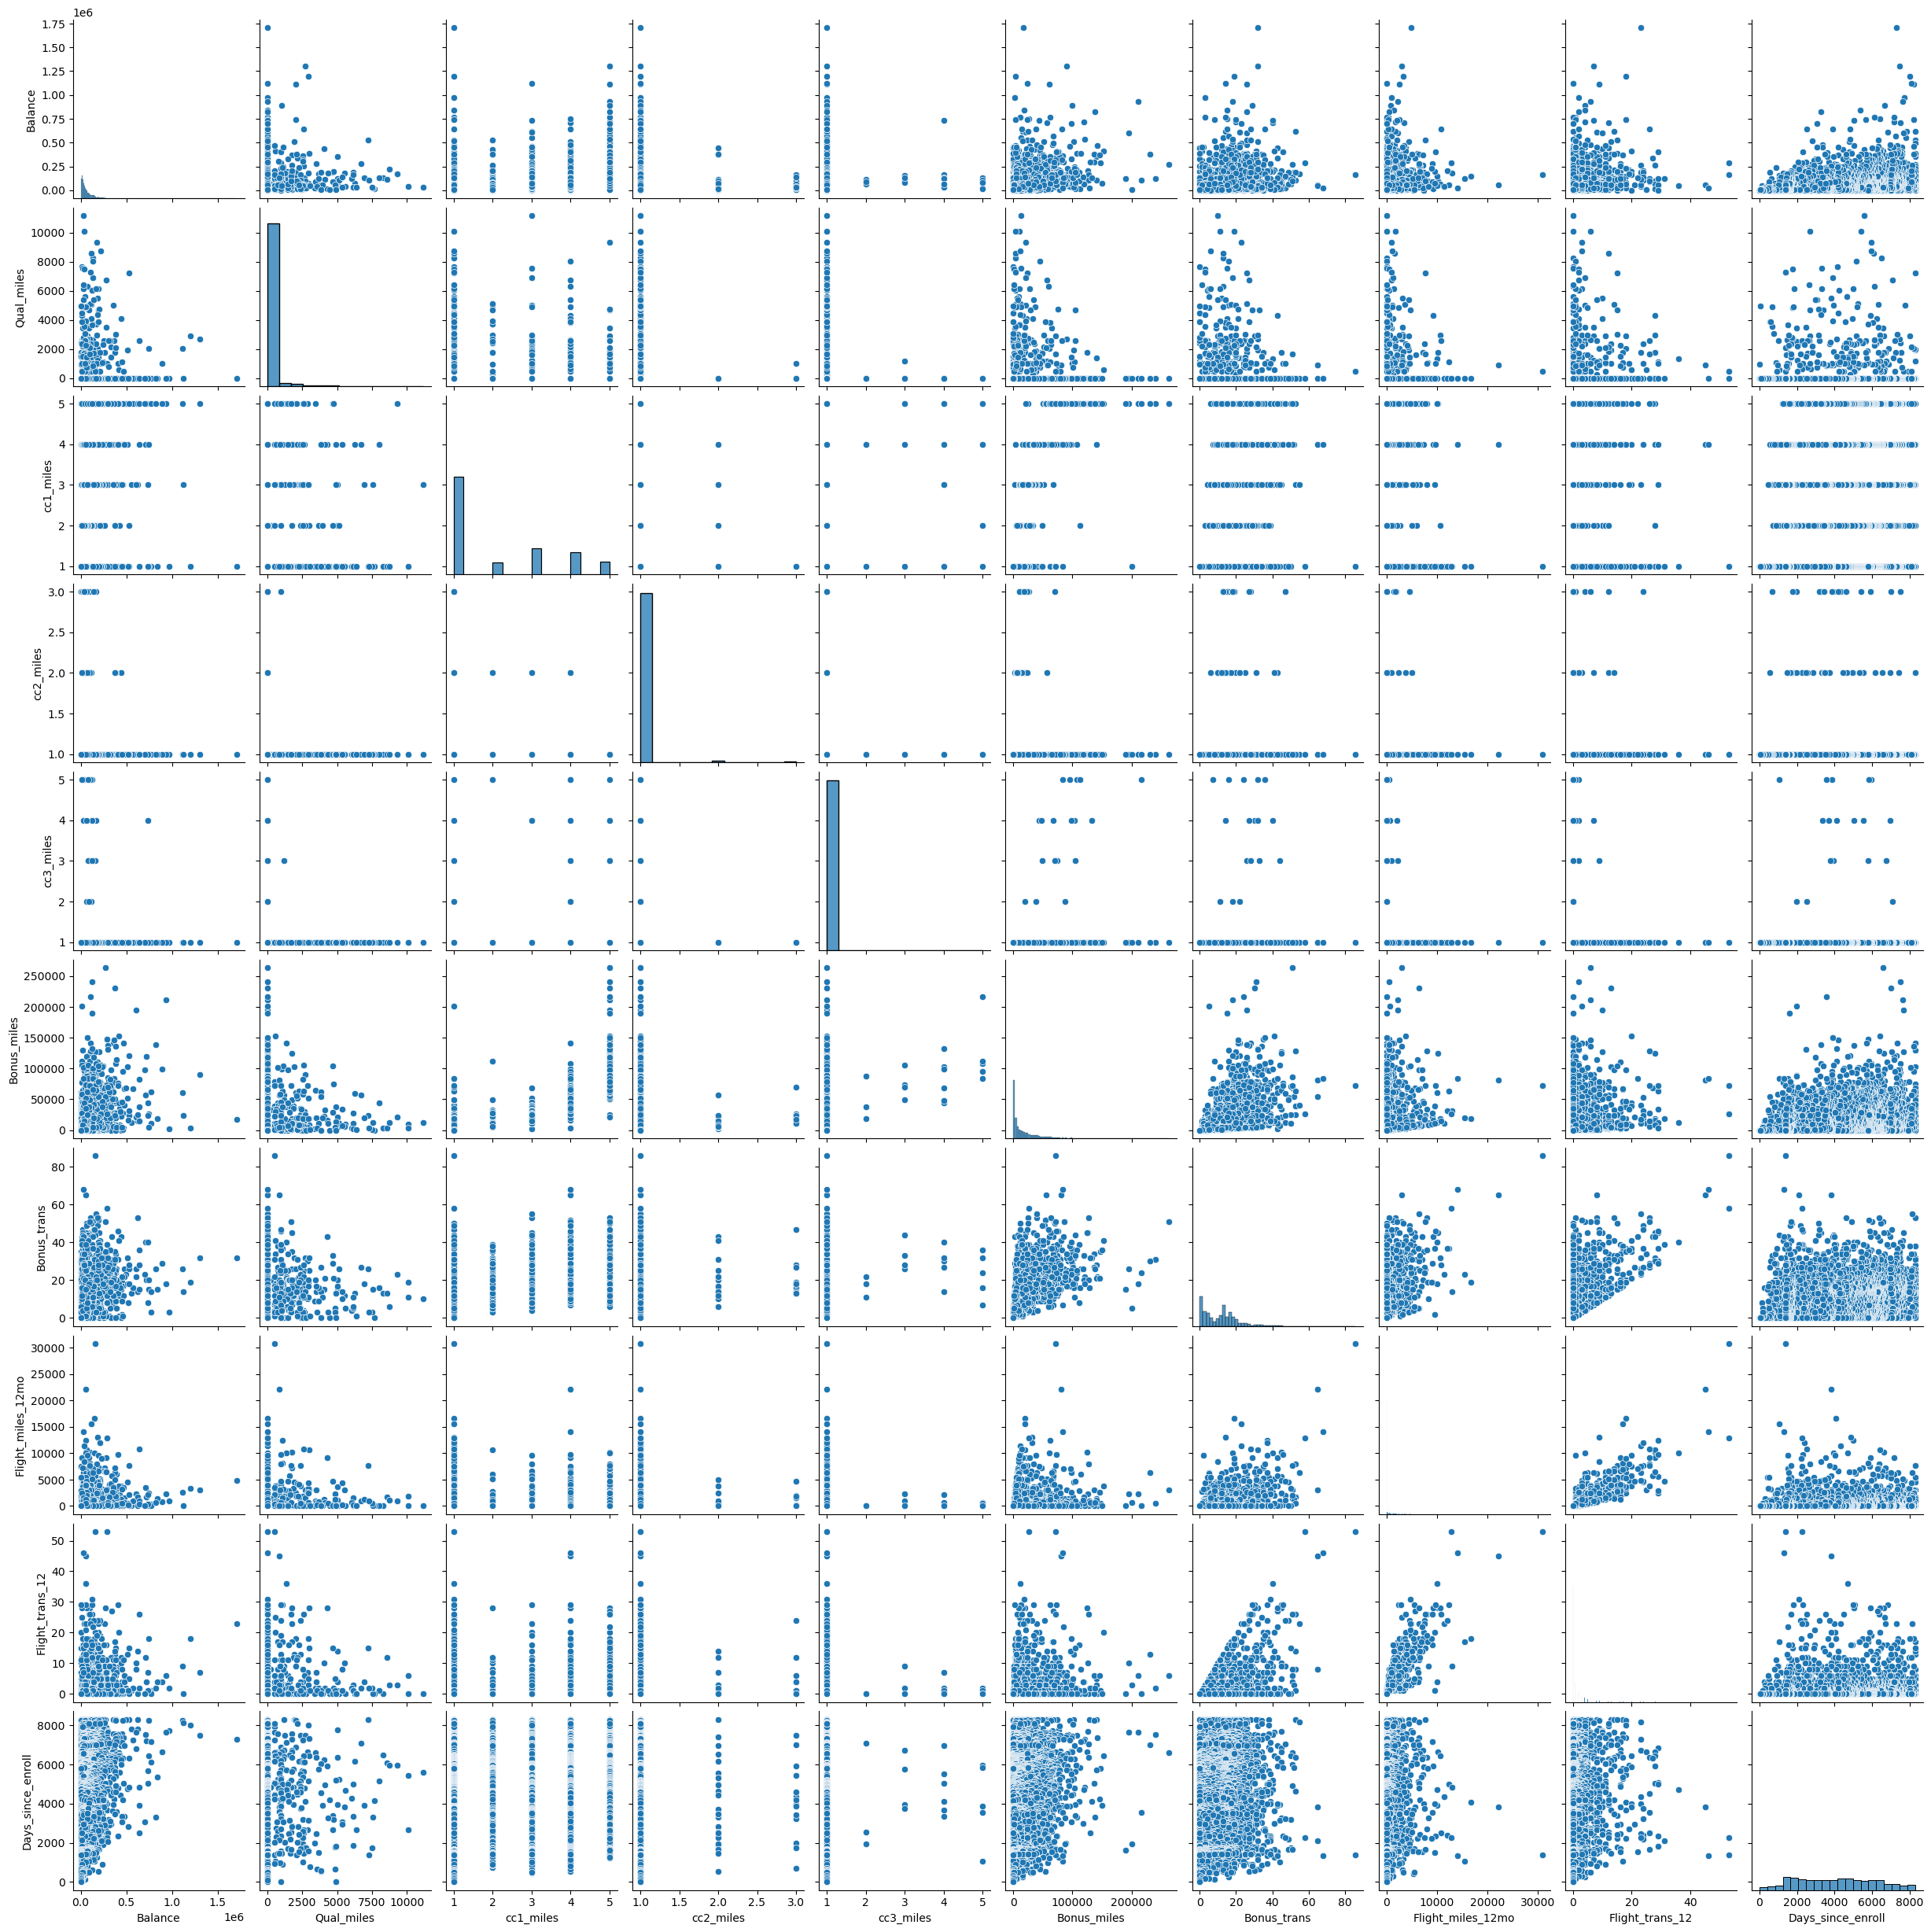

In [23]:
sns.pairplot(df)

In [25]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
st = StandardScaler()
df_Encode = st.fit_transform(df)

In [31]:
df_Encode

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [33]:
df_Encode = pd.DataFrame(df_Encode, columns= df.columns)

## Heierarchy Clustering

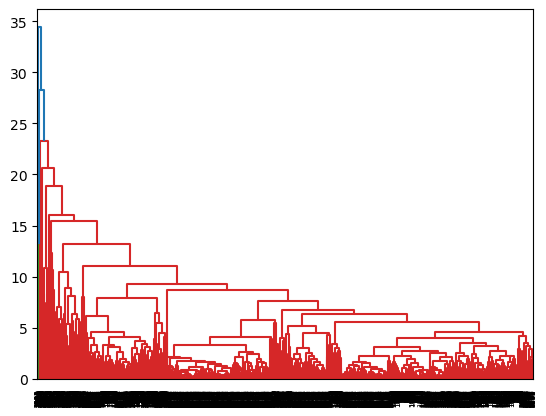

In [36]:
# Dendrogram Creation
from scipy.cluster import hierarchy
lk = hierarchy.linkage(df_Encode, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [38]:
# Model Creation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2)
ypred = hc.fit_predict(df_Encode)
ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
len(ypred)

3999

In [42]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
ID#,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000
2,19244,0,1,1,1,215,2,0,0,6968
3,41354,0,1,1,1,4123,4,0,0,7034
4,14776,0,1,1,1,500,1,0,0,6952
5,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403
4018,64385,0,1,1,1,981,5,0,0,1395
4019,73597,0,3,1,1,25447,8,0,0,1402


In [44]:
df["Cluster"] = ypred 

In [46]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,1
2,19244,0,1,1,1,215,2,0,0,6968,1
3,41354,0,1,1,1,4123,4,0,0,7034,1
4,14776,0,1,1,1,500,1,0,0,6952,1
5,97752,0,4,1,1,43300,26,2077,4,6935,0


In [48]:
df.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster,,,,,,,,,,
0,133424.888788,63.650995,3.801989,1.000000,1.044304,43725.022604,19.746835,807.760398,2.354430,5270.288427
1,50730.653992,174.875907,1.393363,1.020048,1.000000,6983.188731,8.488075,327.127549,0.998617,3678.250951


In [50]:
df[df['Cluster'] == 0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
ID#,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,0
7,84914,0,3,1,1,27482,25,0,0,6994,0
10,104860,0,3,1,1,28426,28,1150,3,6931,0
11,40091,0,2,1,1,7278,10,0,0,6959,0
12,96522,0,5,1,1,61105,19,0,0,6924,0
...,...,...,...,...,...,...,...,...,...,...,...
3940,130748,0,4,1,1,65510,37,6349,7,1545,0
3953,40424,0,4,1,1,44110,26,343,3,1523,0
3957,76595,0,1,1,1,10577,2,9577,1,1515,0


In [52]:
df['Cluster'] = np.where(df['Cluster'] == 1, 0 , 1)

<Axes: xlabel='Balance', ylabel='Flight_miles_12mo'>

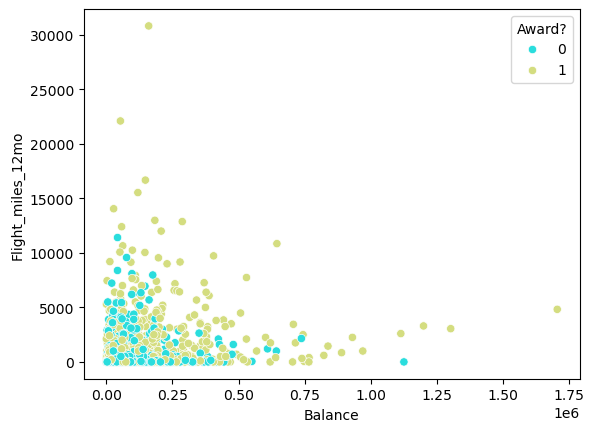

In [54]:
# Before prediction 
sns.scatterplot(x = df['Balance'],y=  df['Flight_miles_12mo'], hue=Award, palette='rainbow')

<Axes: xlabel='Balance', ylabel='Flight_miles_12mo'>

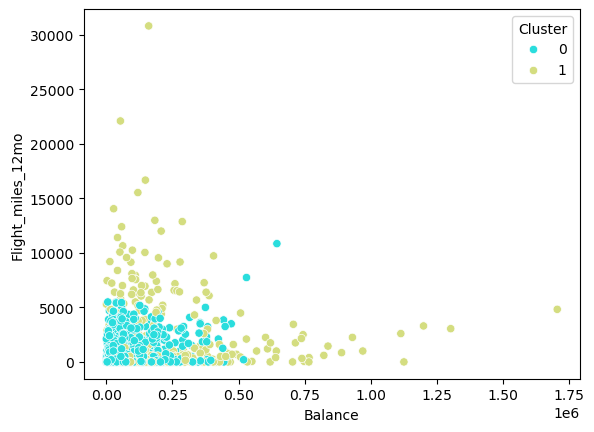

In [56]:
# After Prediction
sns.scatterplot(x = df['Balance'],y=  df['Flight_miles_12mo'], hue=df['Cluster'], palette='rainbow')

In [58]:
# silhouette_score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df, ypred)
sil_score

0.3485418229650542

In [60]:
# Comparision Score 
train_test_label = Award == df["Cluster"]
train_test_label.value_counts("True")

True     0.687172
False    0.312828
Name: proportion, dtype: float64

## K-Mean Clustering

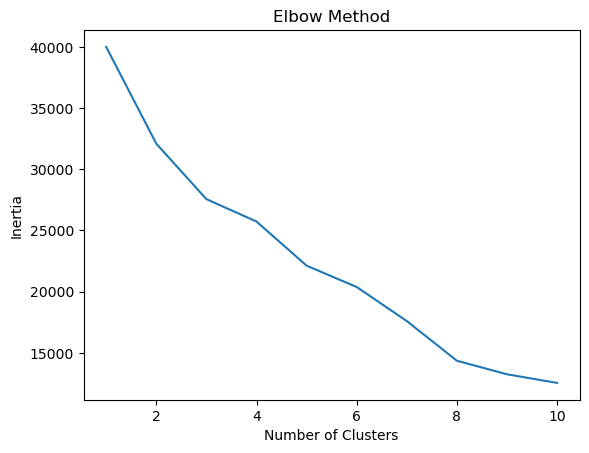

In [63]:
# K-Means Clustering with Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_Encode)
    inertia.append(kmeans.inertia_)
# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [65]:
# Implementing K-Means with optimal K
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_Encode)
labels_kmeans = kmeans.labels_

silhouette_kmeans = silhouette_score(df_Encode, labels_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.35826638416515033


In [67]:
train_test_label = labels_kmeans == Award
train_test_label.value_counts(True)

Award?
True     0.707177
False    0.292823
Name: proportion, dtype: float64

<Axes: xlabel='Balance', ylabel='Flight_miles_12mo'>

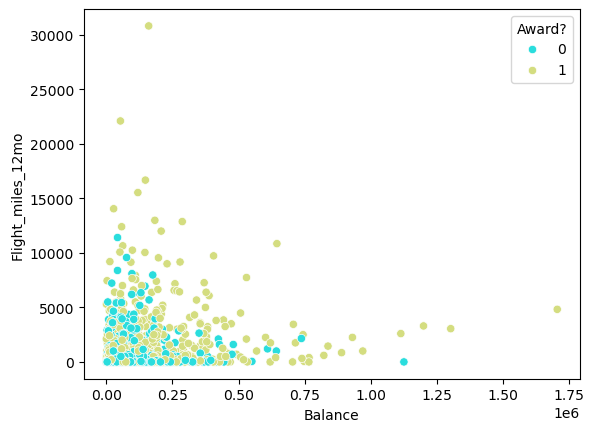

In [69]:
# Before Model Building
sns.scatterplot(x = df['Balance'],y=  df['Flight_miles_12mo'], hue=Award, palette='rainbow')

<Axes: xlabel='Balance', ylabel='Flight_miles_12mo'>

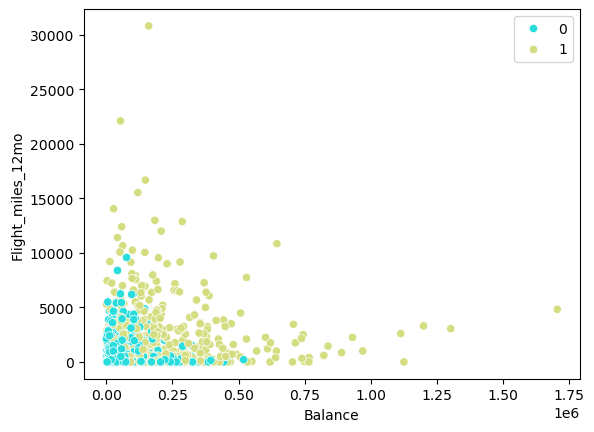

In [71]:
#After MOdel Building
sns.scatterplot(x = df['Balance'],y=  df['Flight_miles_12mo'], hue=labels_kmeans, palette='rainbow')

In [73]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

def k_distance_plot(data, k=5):
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors(data)
    k_dist = distances[:, -1]
    plt.figure(figsize=(10, 6))
    plt.plot(np.sort(k_dist))
    plt.xlabel('Data Points')
    plt.ylabel('Epsilon (k-distance)')
    plt.title('K-distance Plot')
    plt.show()

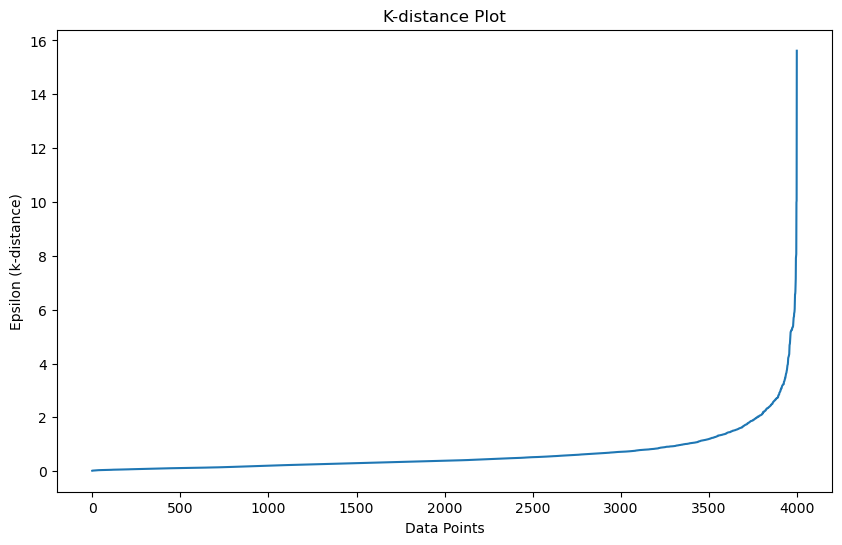

In [75]:
## Plot K-distnce Plot to identify the value of epsilon
k_distance_plot(df_Encode)

In [77]:
dbscan = DBSCAN(eps=5, min_samples=9)
labels_dbscan = dbscan.fit_predict(df_Encode)
silhouette_dbscan = silhouette_score(df_Encode, labels_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: 0.5815824744480916


<Axes: xlabel='Balance', ylabel='Flight_miles_12mo'>

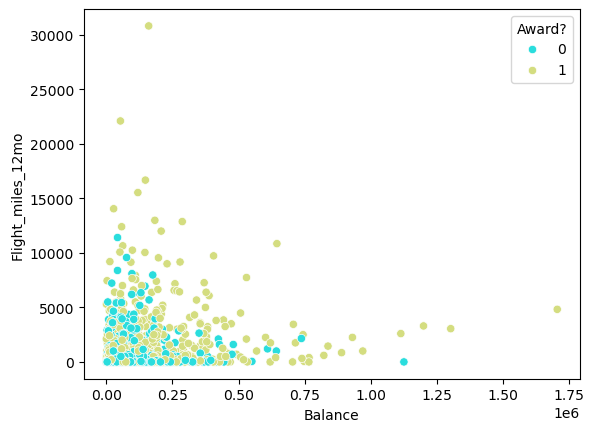

In [79]:
# Before Model Building
sns.scatterplot(x = df['Balance'],y=  df['Flight_miles_12mo'], hue=Award, palette='rainbow')

<Axes: xlabel='Balance', ylabel='Flight_miles_12mo'>

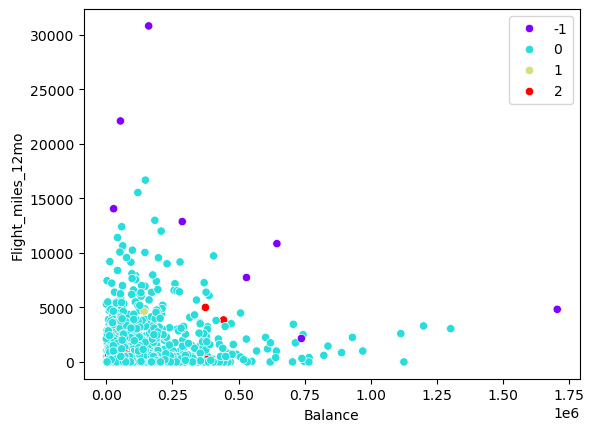

In [81]:
# After Model Building
sns.scatterplot(x = df['Balance'],y=  df['Flight_miles_12mo'], hue=labels_dbscan, palette='rainbow')

In [83]:
labels_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
train_test_label = labels_dbscan == Award
train_test_label.value_counts(True)

Award?
True     0.622406
False    0.377594
Name: proportion, dtype: float64

### Conclusion
In evaluating the clustering performance of the three algorithms—Hierarchical Clustering, K-Means, and DBSCAN—using the silhouette score as a metric, we find notable differences in their effectiveness.

Hierarchical Clustering achieved a silhouette score of 0.34, indicating a moderate level of cohesion within the clusters formed. While this score suggests that there is some degree of meaningful structure in the data, it also points to potential overlap between clusters.

K-Means exhibited a slightly better silhouette score of 0.35, which shows an improvement over Hierarchical Clustering. This score indicates that K-Means may be marginally more effective at defining clusters, allowing for better separation of data points.

DBSCAN, on the other hand, demonstrated the highest silhouette score of 0.52, signifying a strong level of cluster separation and cohesion. This indicates that DBSCAN is particularly adept at identifying dense regions within the dataset, making it a superior choice for this particular analysis.

Overall, the results suggest that DBSCAN outperforms both Hierarchical Clustering and K-Means in this scenario, making it the preferred method for clustering this dataset. The higher silhouette score of DBSCAN reflects its ability to form distinct clusters while minimizing the distance between points within the same cluster, thereby enhancing the overall clustering quality.